# ForwardTEM
This is a tutorial on how to use the `ForwardTEM` class.
`ForwardTEM` is an forward modeller for TEM measurents.
#### Disclaimer
Currently only the `TEM-FAST` device is supported.

## Setup
Make sure the `Modelling` package is installed in your current environment.
Then you can simply import the necessary functionalities:

In [1]:
import numpy as np
from gp_tools.tem.forward.modeller import ForwardTEM

C:\Users\jakob\Documents\Meine Ordner\TU\Geophysik\GP_repo_Peter\geophysics_repo\src\gp_tools\tem\forward\modeller.py:756: SyntaxWarning: invalid escape sequence '\p'
  mpa_labels = ['filler', '$\phi_{max}$ (rad)', r'$\tau_{\phi}$ (s)', 'c']
C:\Users\jakob\Documents\Meine Ordner\TU\Geophysik\GP_repo_Peter\geophysics_repo\src\gp_tools\tem\forward\modeller.py:765: SyntaxWarning: invalid escape sequence '\p'
  '$\phi_{max}$ (rad)': 'Max. Phase Angle',
C:\Users\jakob\Documents\Meine Ordner\TU\Geophysik\GP_repo_Peter\geophysics_repo\src\gp_tools\tem\forward\modeller.py:773: SyntaxWarning: invalid escape sequence '\p'
  '$\phi_{max}$ (rad)': (-0.1, 6.4),


Next create an instance of the `ForwardTEM()` class:

In [2]:
forward_solver = ForwardTEM()

## Settings
Now you can adjust which configurations you want to use for your model.
All settings have an default value, but you can adjust them, if you want to.

### Device settings
The `TEM-FAST` device has different settings for the measurements which are also considered for the modelling:
- Timekey (`timekey`): integer,  
A number from 1 to 9 which determines the number of timegates used. The default is 9.
- Selected current (`currentkey`): integer,  
If the device should inject 1 or 4 A of current. The default is 1.
- Loopsize (`loop`): float,  
The side lenght in Meters of the square loop. The default is 12.5.
- Injected Current (`current_inj`): float,  
If an measurment was performed, the current, which was actually injected by the device can be added here. This resorts to the theoretical injected current (`currentkey`) as the default.
- Powerline filter (`filter_powerline`): integer,  
If 50 or 60 Hz frequency should be filtered. The default is 50.

### Modelling settings
Settings which are relevant for the modelling:
- The resistivity model (`model`): numpy.array() or list
The model of the layered subsurface containing the thickness and resistivity of each layer.
This can be added easier with the `add_resistivity_model()` method.
- An absolute error (`absolute_error`): float
An absolute error used to simulate a random error. The default is 1e-28.
- An relative error (`relative_error`): float
A relative error used to simulate a random error. The default is 1e-6.

### Plotting settings
For the creation of the plots more things can be changed:
- Add a title to the plot (`plot_title`): str
Adds a super title to the whole figure.
- Keep plotting on the same figure (`track`): boolean, 
When modelling different models, the results can be plotted on the same figure or a new figure is created for every model. The default is `False`. This means a new plot is created for each model.
- Convert to Conductivity (`res2con`): boolean,  
If the results should be plotted as resistivity or conductivity. The default is `False`. This means, that the resistivities are plotted.
- Ax limits for time (`time_limits`): tuple of two numbers,  
Gives an lower and upper limit for the time axis in the plots. The default is None (`matplotlib` chooses).
- Ax limits for signal (`signal_limits`): tuple of two numbers,  
Gives an lower and upper limit for the signal axis in the plots. The default is None (`matplotlib` chooses).
- Ax limits for apparent resistivity/conductivity (`rhoa_limits`): tuple of two numbers,  
Gives an lower and upper limit for the apparent resistivity/conductivity axis in the response plot. The default is None (`matplotlib` chooses).
- Ax limits for model resistivity/conductivity (`rho_limits`): tuple of two numbers,  
Gives an lower and upper limit for the resistivity/conductivity axis in the model plot. The default is None (`matplotlib` chooses).
- Ax limits for model depth (`depth_limits`): tuple of two numbers,  
Gives an lower and upper limit for the depth axis in the model plot. The default is None (`matplotlib` chooses).

### Example
Here some of the settings are adjusted:

In [3]:
# Set loop size in meters (side length of the square loop)
forward_solver.loop = 50

# Choose the current key: 1 or 4 (A)
forward_solver.currentkey = 4

# Choose time key: 1 - 9 (number of timegates)
forward_solver.timekey = 9

# Setting limits for the model-plot
forward_solver.depth_limits = (0, 60)

forward_solver.signal_limits = (0.000000000000000001, 0.1)
forward_solver.rhoa_limits = (0, 4000)
forward_solver.rho_limits = (0, 4200)

# Add a title to the plot
forward_solver.plot_title = r"Thickness Modeling (L1: 200 $\Omega \cdot$ m, L2: 500 $\Omega \cdot$ m, L3: 4000 $\Omega \cdot$ m)"

In [ ]:
import os

# Define your target folder (use raw string for Windows paths)
save_dir = r"C:\Users\katri\Documents\SS2025\Master Thesis Project\Results\Modelling\Modelling_TEM_IP\Modelling\Notebooks\results"

# Make sure the directory exists
os.makedirs(save_dir, exist_ok=True)

### Adding a model

The easiest mode of doing this is by using the `add_resistivity_model()` method. 
First create to lists (or arrays) with the same lenghts:
- One for the thicknesses of each layer.
- One for the resistivity of each layer.

Now call the method and assign the correct list to to correct parameter:

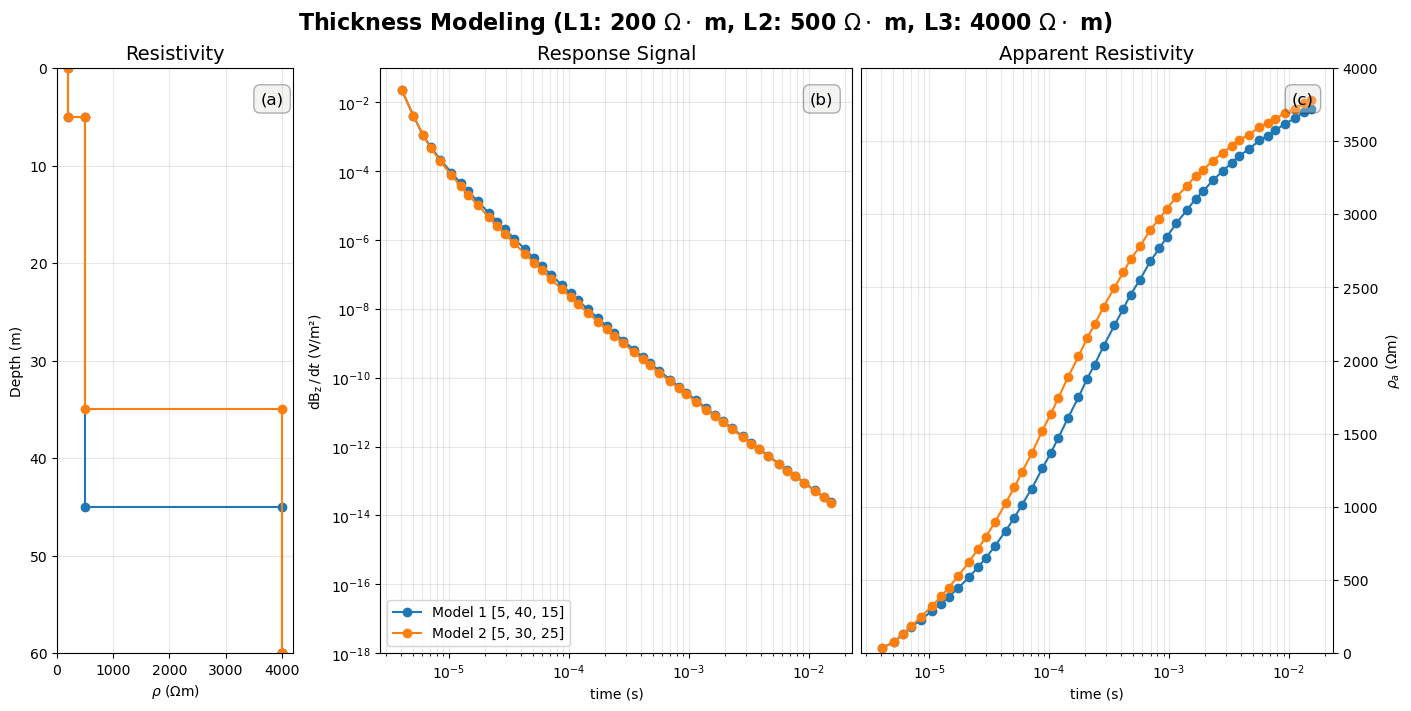

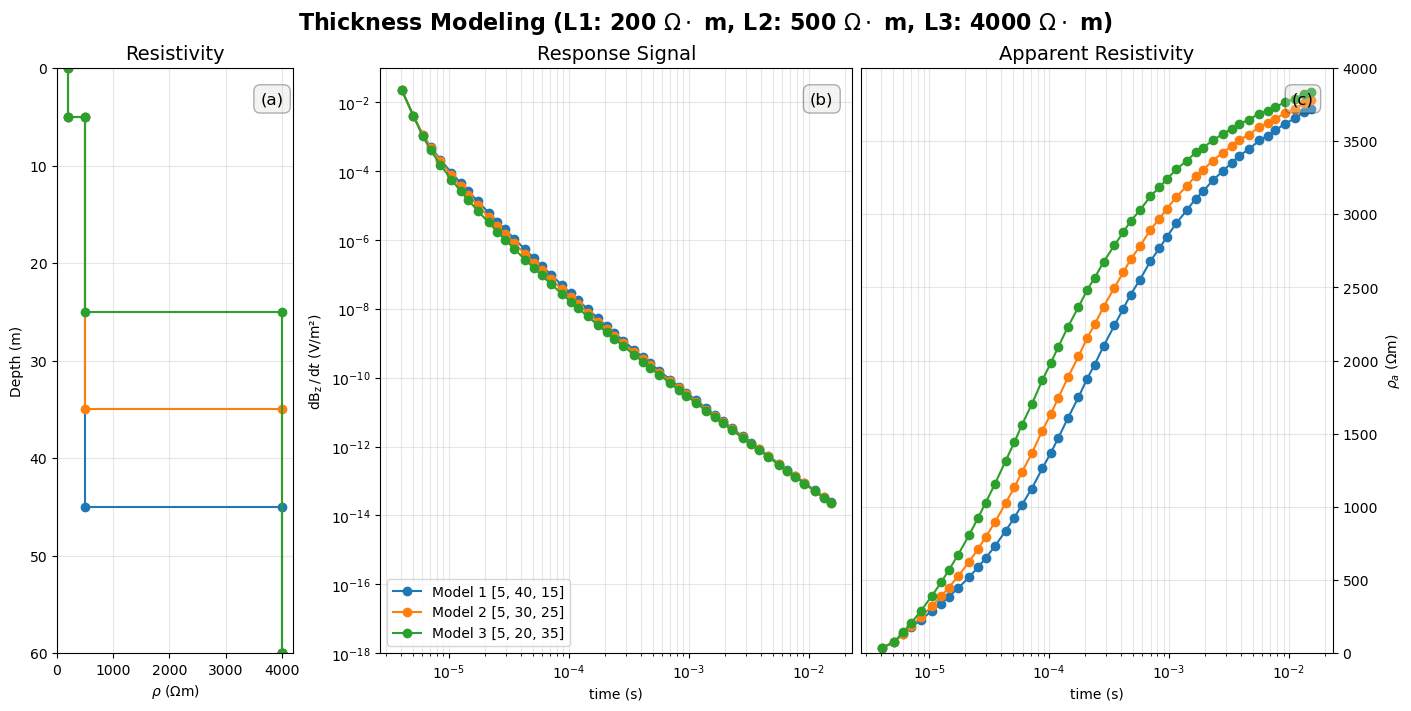

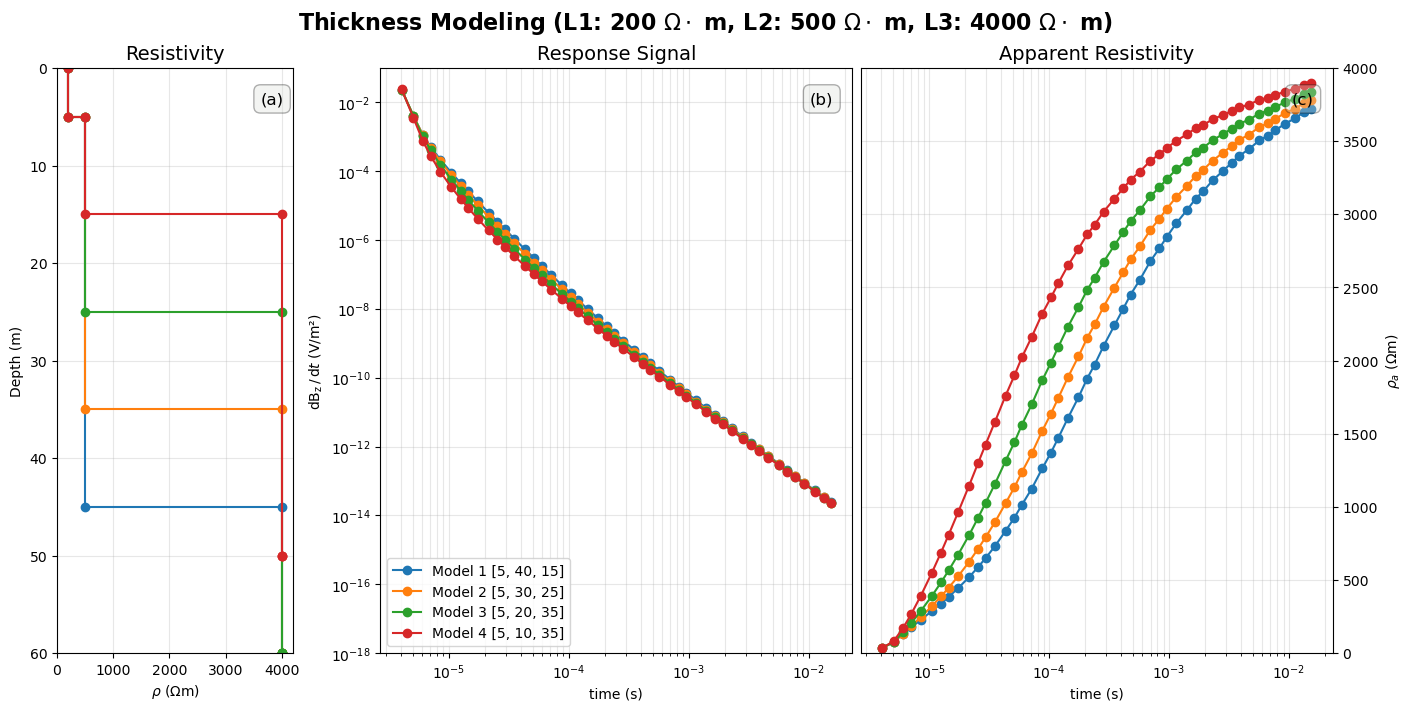

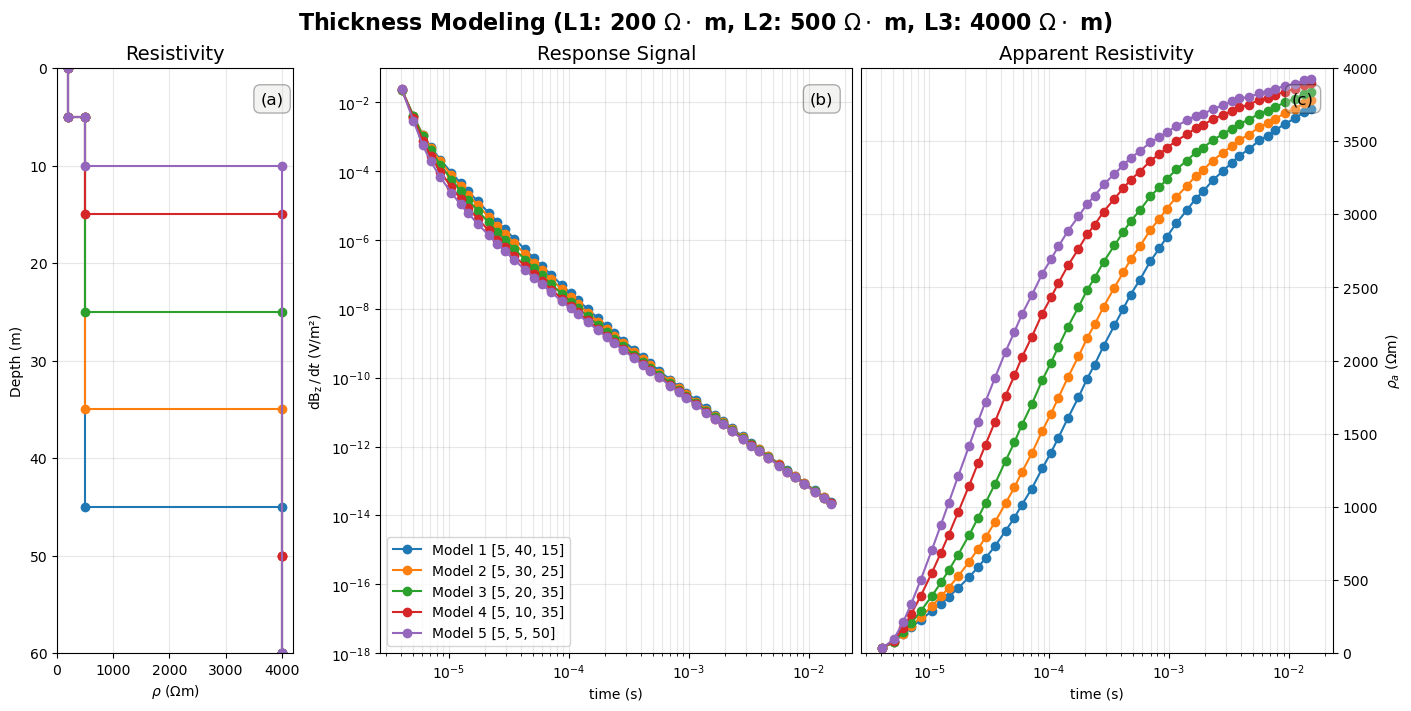

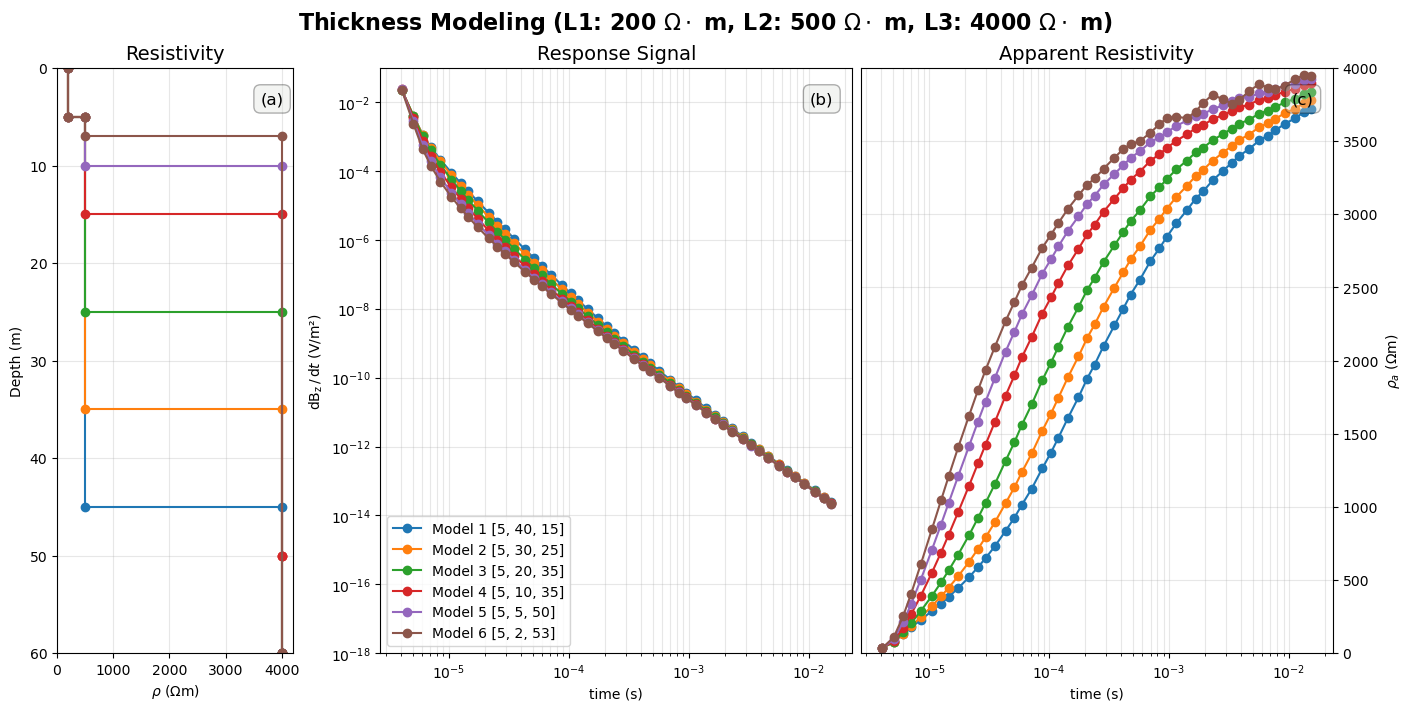

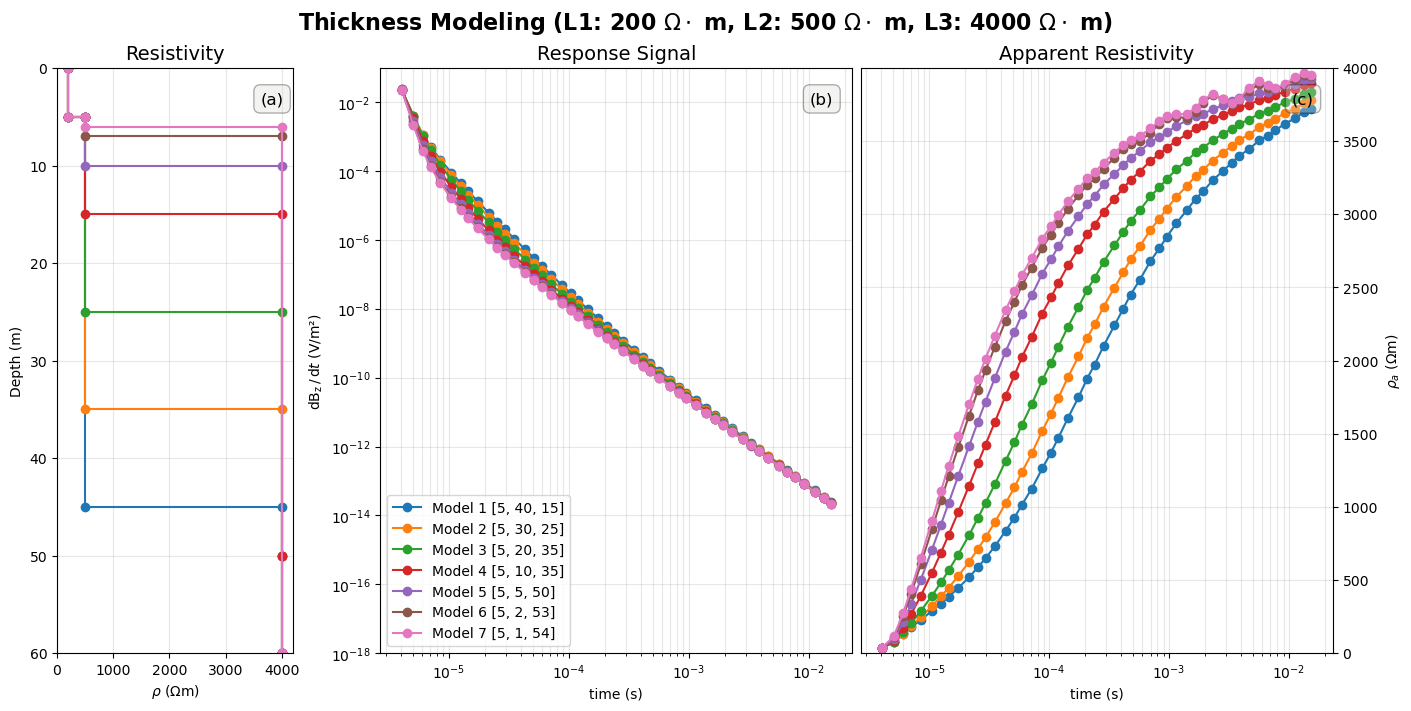

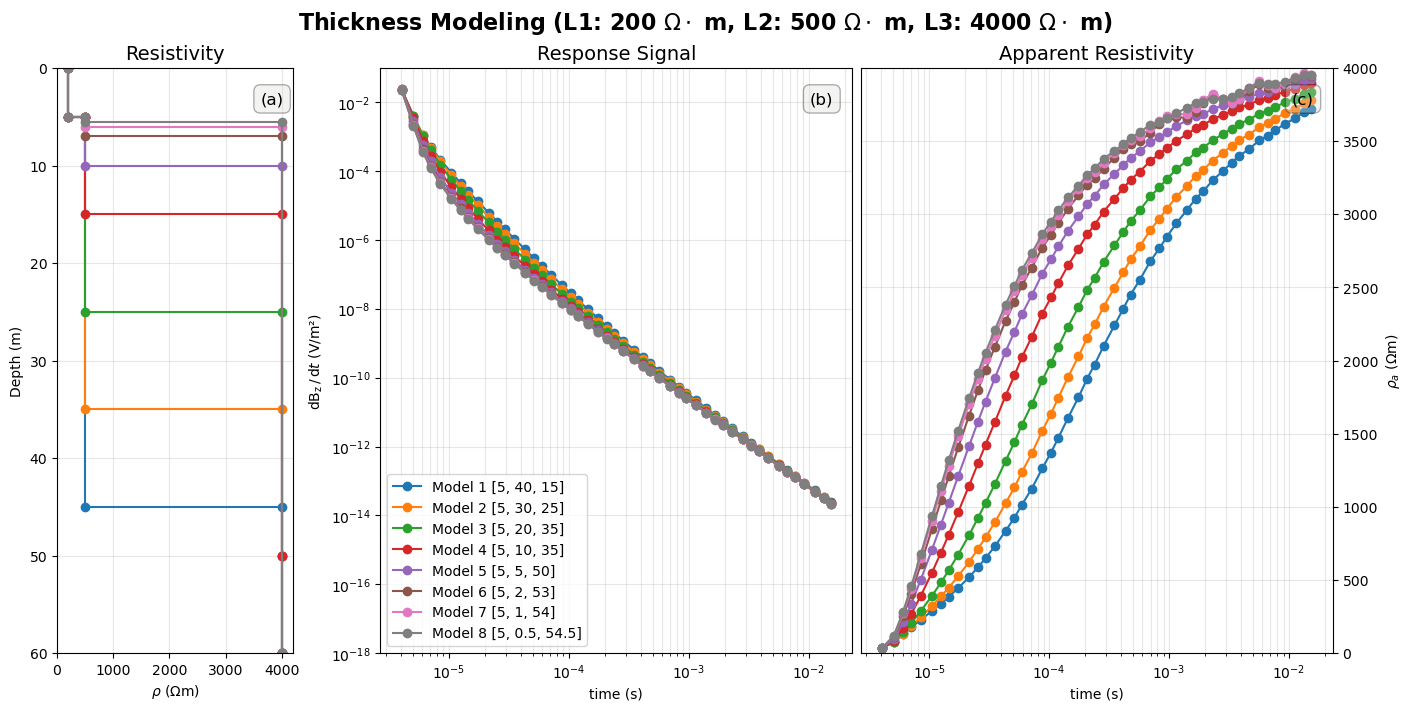

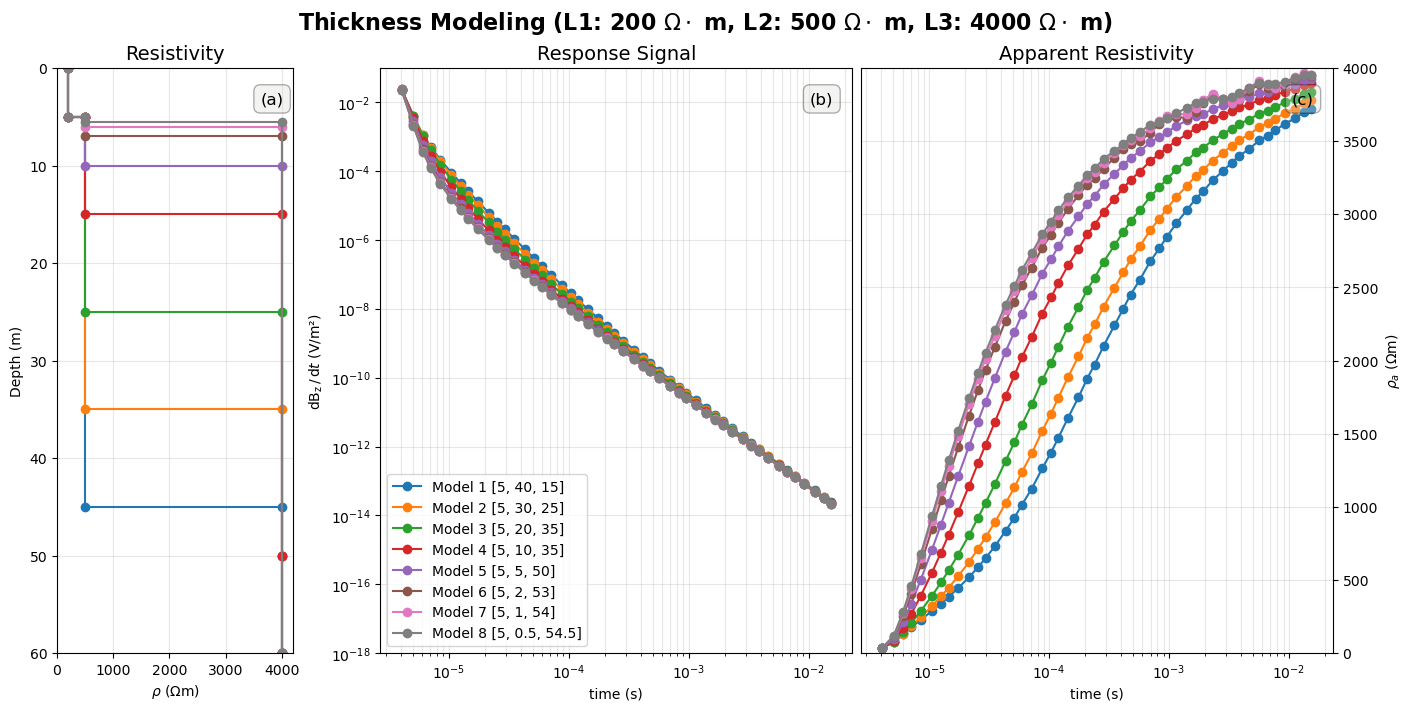

In [4]:
forward_solver.track = True

thicknesses = [
    [5, 40, 15],
    [5, 30, 25],
    [5, 20, 35],
    [5, 10, 35],
    [5, 5, 50],
    [5, 2, 53],
    [5, 1, 54],
    [5, 0.5, 54.5]
]

rho = [200, 500, 4000]

for i, thks in enumerate(thicknesses, 1):
    forward_solver.add_resistivity_model(thickness=thks, resistivity=rho)
    forward_solver.run(f"Model {i} {thks}")

# Add the model with the thickness and resistivity of each layer
#forward_solver.add_resistivity_model(thickness=thks1, resistivity=rho)

Another way of achieving the same result:

In [ ]:
# Create the model (thickness first)
#model = np.column_stack((thks, rho))

#forward_solver.model = model

### Run the modeller
Now you can finally run the forward modeller and create some plots.
The `run()` method returns the matplotlib figure and axes created. You can use `savefig()` to save the plot.


In [ ]:
# Run the forward modeller
forward_solver.run(r'Model 1 [5, 40, $\infty$]')

# Save the figure
forward_solver.savefig('1.3.1_PF_thicknesses_200,500,4000.png')


You can also plot the modelled response with a random error.
This random error also depends on  absolute and relative error attributes.

So lets set those and run the modeller:

In [ ]:
# Add an error
forward_solver.absolute_error = 1e-7 # (10^-7)
forward_solver.relative_error = 0.0025

# Run the modelling
forward_solver.run('Noisy Sounding', plot_noisy=True)

You can also plot the conductivity instead:

In [ ]:
forward_solver.res2con = True

forward_solver.run('Sounding')

### Track
With the track parameter you can plot multiple graphs in the same figure. 

First let's clear the last plot:

In [ ]:
# Clearing previous plots from memory
forward_solver.clear_plot()

Now we can for example compare how the injected current affects the result.
For this we keep the model from before.
First we turn on `track`and change the `currentkey` attribute:

In [ ]:
# Turning on the tracking
forward_solver.track = True

# Setting the injected current to 1 Ampere
forward_solver.currentkey = 1

Now we can also change the title and run the modelling:

In [ ]:
# Change title
forward_solver.plot_title = 'Effects of different injected currents'

# Run the modeller
forward_solver.run(description='1 A') # before we also set the description parameter

Now we repeat it with a different currenkey:

In [ ]:
# Setting the injected current to 4 Ampere
forward_solver.currentkey = 4

# You can also set which color the plot should have
forward_solver.run(description='4 A', color='red')

You can see that the model (left) is the same for both.

We can also to the same thing with different subsurface models:

In [ ]:
forward_solver.clear_plot()
forward_solver.plot_title = 'Comparison of different Anomalies'

forward_solver.add_resistivity_model(thickness=[10, 10, 10], resistivity=[30, 100, 30])
forward_solver.run('Resistive')

In [ ]:

forward_solver.add_resistivity_model(thickness=[10, 10, 10], resistivity=[30, 10, 30])
forward_solver.run('Conductive')